In [1]:
!pip install littlelearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.0 MB/s eta 0:00:00


## first install little learn

and here we want make custom model mlp, why we not use Sequential ? because we want know how to neural network working in layers to layers

In [3]:
from littlelearn import DeepLearning as dl

## i want make multiclassification mlp

In [4]:
class MLP  :
  def __init__ (self,num_class) :
    self.Linear1 = dl.layers.Dense(32,activation='relu')
    self.Linear2 = dl.layers.Dense(64,activation='relu')
    self.Linear3 = dl.layers.Dense(16,activation='relu')
    self.f_out = dl.layers.Dense(num_class,activation='softmax')

  def get_weight(self):
    weight = []
    for layers in [self.Linear1,self.Linear2,self.Linear3,self.f_out] :
      w = layers.get_weight()
      if w is not None :
        for i in w :
          weight.append(i)
    return weight

  def __call__ (self,x) :
    x = self.Linear1(x)
    x = self.Linear2(x)
    x = self.Linear3(x)
    out = self.f_out(x)
    return out

## lets make datasets from sklearn make classification

In [11]:
from sklearn.datasets import make_classification
x_train,y_train = make_classification(n_samples=500,n_features=30,n_classes=5,n_clusters_per_class=2,n_informative=15)

lest import loss class and optimizers class

In [13]:
loss_fn = dl.loss.SparseCategoricallCrossentropy()
optimizer_fn = dl.optimizers.Rmsprop()

In [15]:
import numpy as np
losrecord = list()
import matplotlib.pyplot as plt

In [16]:
model = MLP(num_class=5)

### lest make Training loop custom

In [18]:
for epoch in range(100) :
  outputs = model(x_train)
  loss = loss_fn(y_train,outputs)
  losrecord.append(loss.get_tensor())
  loss.AutoClipGradient()
  loss.backwardpass()
  optimizer_fn.apply_weight(model.get_weight())
  optimizer_fn.forward_in_weight()
  loss.kill_grad()

  print(f"epoch { epoch+ 1} loss : {loss.tensor}")

epoch 1 loss : 0.6601441502571106
epoch 2 loss : 0.6532666087150574
epoch 3 loss : 0.6468799114227295
epoch 4 loss : 0.6406404972076416
epoch 5 loss : 0.633979856967926
epoch 6 loss : 0.6271843314170837
epoch 7 loss : 0.6207886934280396
epoch 8 loss : 0.6141316890716553
epoch 9 loss : 0.6080349087715149
epoch 10 loss : 0.6017100214958191
epoch 11 loss : 0.5954242944717407
epoch 12 loss : 0.5889871716499329
epoch 13 loss : 0.5832216143608093
epoch 14 loss : 0.5771288871765137
epoch 15 loss : 0.5713498592376709
epoch 16 loss : 0.5658296942710876
epoch 17 loss : 0.5604250431060791
epoch 18 loss : 0.5549070239067078
epoch 19 loss : 0.5488114356994629
epoch 20 loss : 0.5430068373680115
epoch 21 loss : 0.5372195839881897
epoch 22 loss : 0.5315974354743958
epoch 23 loss : 0.5256931185722351
epoch 24 loss : 0.5202483534812927
epoch 25 loss : 0.5148523449897766
epoch 26 loss : 0.5101119875907898
epoch 27 loss : 0.5044766068458557
epoch 28 loss : 0.499411940574646
epoch 29 loss : 0.4942286610603

In [19]:
model(x_train)

(Tensor with shape : ((500, 5)) : 
  [[1.1682495e-01 7.6234722e-01 1.0409318e-02 3.0303897e-02 8.0113843e-02]
 [8.9975756e-01 5.2618557e-03 3.3640822e-03 1.7206645e-02 7.4409001e-02]
 [4.2173499e-03 8.3449376e-01 1.4497267e-04 1.6088802e-01 2.5518439e-04]
 ...
 [1.7838922e-01 1.4858192e-02 1.4086126e-01 3.9324217e-02 6.2656653e-01]
 [1.8407537e-01 3.9962955e-02 1.4320014e-02 3.8934678e-02 7.2270632e-01]
 [1.3950152e-03 1.5502513e-03 1.3537027e-04 9.9596524e-01 9.5316581e-04]])

In [20]:
y_pred = model(x_train)

In [21]:
y = np.argmax(y_pred.get_tensor(),axis=1)

In [22]:
y

array([1, 0, 1, 2, 2, 3, 1, 4, 1, 3, 3, 2, 2, 1, 3, 4, 4, 1, 2, 0, 0, 4,
       1, 1, 1, 1, 2, 0, 0, 2, 3, 2, 2, 4, 4, 1, 4, 2, 3, 2, 0, 2, 1, 2,
       0, 0, 3, 4, 1, 1, 0, 2, 2, 3, 1, 1, 2, 2, 3, 0, 0, 4, 3, 0, 3, 3,
       1, 2, 4, 2, 1, 2, 2, 1, 0, 4, 0, 4, 3, 4, 4, 2, 1, 1, 2, 1, 4, 4,
       2, 2, 4, 4, 1, 3, 3, 4, 4, 3, 3, 0, 1, 1, 4, 4, 3, 1, 3, 0, 3, 3,
       3, 3, 1, 1, 1, 0, 3, 0, 3, 1, 3, 0, 3, 1, 2, 0, 2, 0, 1, 0, 2, 4,
       4, 0, 0, 4, 1, 3, 3, 3, 3, 2, 1, 4, 2, 4, 3, 2, 0, 4, 2, 3, 0, 4,
       4, 1, 3, 3, 0, 4, 1, 1, 1, 1, 1, 0, 1, 3, 0, 2, 2, 2, 0, 1, 4, 4,
       3, 0, 2, 1, 2, 4, 2, 0, 3, 4, 3, 1, 1, 0, 2, 0, 3, 1, 4, 0, 4, 2,
       4, 1, 3, 0, 1, 1, 3, 4, 0, 2, 1, 4, 4, 3, 3, 3, 3, 3, 2, 1, 0, 3,
       1, 1, 2, 1, 3, 0, 2, 1, 3, 4, 0, 0, 4, 1, 1, 4, 1, 4, 1, 0, 0, 3,
       2, 1, 4, 4, 4, 1, 4, 1, 4, 2, 1, 2, 1, 3, 0, 1, 0, 1, 1, 0, 4, 3,
       0, 1, 2, 1, 2, 0, 0, 4, 2, 4, 0, 0, 2, 1, 1, 3, 0, 0, 0, 3, 1, 0,
       1, 0, 2, 0, 0, 2, 4, 0, 2, 0, 1, 2, 1, 4, 0,

In [23]:
y_train

array([1, 0, 1, 2, 2, 3, 1, 4, 1, 3, 3, 2, 2, 4, 3, 4, 4, 1, 2, 0, 0, 4,
       1, 1, 1, 1, 2, 0, 0, 2, 3, 2, 2, 4, 4, 1, 4, 2, 3, 2, 0, 4, 1, 2,
       0, 0, 3, 4, 1, 1, 0, 2, 2, 3, 1, 1, 2, 2, 3, 0, 0, 4, 0, 0, 3, 3,
       1, 2, 4, 2, 1, 2, 2, 1, 0, 4, 0, 4, 3, 4, 4, 2, 1, 1, 2, 1, 4, 4,
       2, 2, 4, 4, 1, 3, 3, 4, 4, 3, 3, 0, 1, 1, 4, 4, 3, 1, 3, 0, 3, 3,
       3, 3, 1, 1, 1, 0, 3, 4, 3, 1, 3, 0, 3, 1, 2, 0, 2, 0, 1, 0, 2, 4,
       4, 0, 0, 4, 1, 3, 3, 3, 3, 2, 1, 4, 2, 4, 3, 2, 0, 4, 2, 3, 0, 4,
       4, 1, 3, 3, 0, 4, 1, 1, 1, 1, 1, 0, 1, 3, 0, 2, 2, 2, 0, 1, 4, 4,
       3, 0, 2, 1, 2, 4, 2, 0, 3, 4, 3, 1, 1, 0, 2, 0, 4, 1, 4, 0, 4, 2,
       4, 1, 3, 0, 1, 1, 3, 4, 0, 2, 1, 4, 4, 0, 3, 3, 3, 3, 2, 1, 0, 3,
       1, 1, 2, 1, 3, 0, 2, 1, 3, 4, 0, 0, 4, 1, 1, 4, 1, 4, 1, 0, 0, 3,
       2, 1, 4, 4, 3, 1, 4, 1, 4, 2, 1, 2, 1, 3, 0, 1, 0, 1, 2, 0, 4, 3,
       0, 1, 2, 1, 2, 0, 0, 4, 2, 4, 0, 0, 2, 1, 1, 3, 0, 0, 0, 3, 1, 0,
       1, 0, 2, 0, 0, 2, 4, 0, 2, 0, 1, 2, 1, 4, 0,

In [25]:
print(f"accuracy : {np.mean(np.where(y==y_train,1,0))}")

accuracy : 0.97


In [26]:
import matplotlib.pyplot as plt

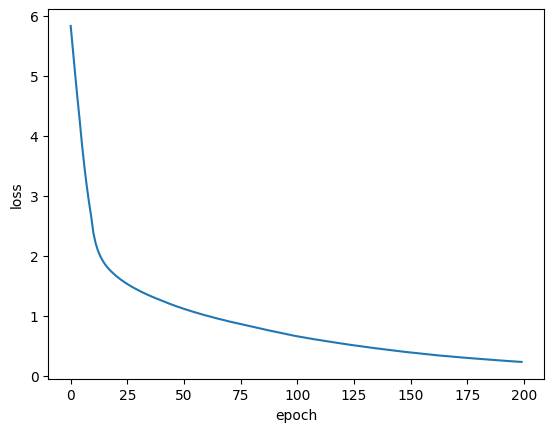

In [27]:
plt.plot(np.arange(len(losrecord)),np.array(losrecord))
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

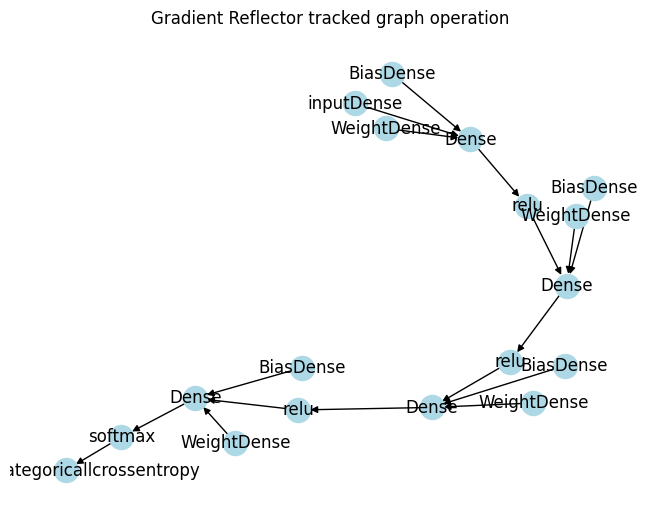

In [28]:
loss.plot_trace_operation()